### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [4]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [2]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0       Male   18              12.30                      39             210   
1       Male   23              12.30                      81             524   
2     Female   22              13.12                       6              40   
3     Female   25              13.12                      77             562   
4     Female   33              13.94                      40             366   
...      ...  ...                ...                     ...             ...   
1995  Female   37              84.46                      69            4031   
1996  Female   43              92.66                       8             539   
1997    Male   34              92.66                      91            5614   
1998    Male   34              98.40                      16            1048   
1999    Male   32              92.66                       8             479   

     education language platform  product  \
0     graduate       EN      Web      453   
1     graduate       EN      Web      466   
2     graduate       EN      Web      254   
3     graduate       EN      Web      263   
4     graduate       EN      Web      291   
...        ...      ...      ...      ...   
1995       PhD       EN      Web      977   
1996       PhD       EN      Web      979   
1997  graduate       EN      Web     1012   
1998       PhD       EN      Web     1031   
1999       PhD       EN      Web      453   

                                                 review  \
0     When it comes to a DM's screen, the space on t...   
1     An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     Nice art, nice printing.  Why two panels are f...   
3     Amazing buy! Bought it as a gift for our new d...   
4     As my review of GF9's previous screens these w...   
...                                                 ...   
1995  The perfect word game for mixed ages (with Mom...   
1996  Great game.  Did not think I would like it whe...   
1997  Great game for all.........\nKeeps the mind ni...   
1998                                          fun game!   
1999  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 11 columns]

In [3]:
# Any missing values?
reviews.isna().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [5]:
# Explore the data.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [14]:
reviews.dtypes

gender                     object
age                         int64
remuneration (k£)         float64
spending_score (1-100)      int64
loyalty_points              int64
education                  object
language                   object
platform                   object
product                     int64
review                     object
summary                    object
dtype: object

In [9]:
# Descriptive statistics.
reviews.describe()

age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        2000.000000             2000.000000     2000.000000   
mean     39.495000          48.079060               50.000000     1578.032000   
std      13.573212          23.123984               26.094702     1283.239705   
min      17.000000          12.300000                1.000000       25.000000   
25%      29.000000          30.340000               32.000000      772.000000   
50%      38.000000          47.150000               50.000000     1276.000000   
75%      49.000000          63.960000               73.000000     1751.250000   
max      72.000000         112.340000               99.000000     6847.000000   

            product  
count   2000.000000  
mean    4320.521500  
std     3148.938839  
min      107.000000  
25%     1589.250000  
50%     3624.000000  
75%     6654.000000  
max    11086.000000

## 2. Drop columns

In [33]:
# Drop unnecessary columns.
reviews_1 = reviews.drop(['language', 'platform'], axis=1)
# View column names.
reviews_1.columns.values

array(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype=object)

## 3. Rename columns

In [56]:
# Rename the column headers.
reviews_1.rename(columns={'remuneration (k£)':'remuneration', 'spending_score (1-100)':'spending'}, inplace=True)

# View column names.
reviews_1.columns.values

array(['gender', 'age', 'remuneration', 'spending_score',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype=object)

## 4. Save the DataFrame as a CSV file

In [57]:
# Create a CSV file as output.
reviews_1.to_csv('turtle_reviews_1.csv')

In [5]:
# Import new CSV file with Pandas.
reviews_2 = pd.read_csv('turtle_reviews_1.csv')

# View DataFrame.
reviews_2.info()
reviews_2.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2000 non-null   int64  
 1   gender          2000 non-null   object 
 2   age             2000 non-null   int64  
 3   remuneration    2000 non-null   float64
 4   spending_score  2000 non-null   int64  
 5   loyalty_points  2000 non-null   int64  
 6   education       2000 non-null   object 
 7   product         2000 non-null   int64  
 8   review          2000 non-null   object 
 9   summary         2000 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 156.4+ KB


(2000, 10)

## 5. Linear regression

### 5a) spending vs loyalty

In [6]:
# Independent variable.
x = reviews_2['spending_score']

# Dependent variable.
y = reviews_2['loyalty_points']

# OLS model and summary.
f = 'y ~ x'
test = ols(f, data = reviews_2).fit()
# View the summary.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Wed, 07 Jun 2023   Prob (F-statistic):          2.92e-263
Time:                        20:42:45   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
# Extract the estimated parameters.
print("Parameters: ", test.params)

# Extract the standard errors.
print("Standard errors: ", test.bse)

# Extract the predicted values.
print("Predicted values: ", test.predict())  

Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [9]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = (-75.052663) + 33.061693*x

# View the output.
y_pred

0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1995    2206.204154
1996     189.440881
1997    2933.561400
1998     453.934425
1999     189.440881
Name: spending_score, Length: 2000, dtype: float64

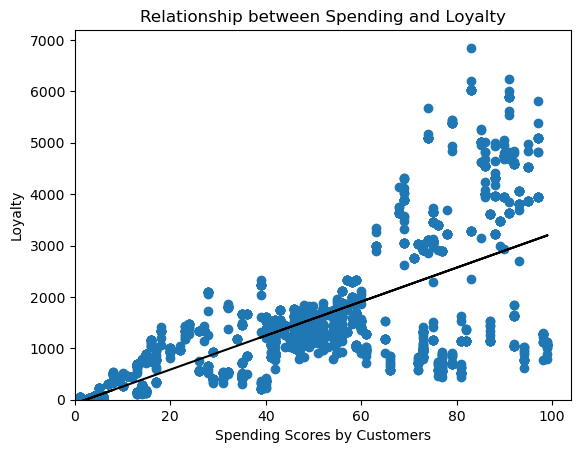

In [13]:
# Plot the graph with a regression line.
# Plot the data points with a scatterplot.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)
plt.title('Relationship between Spending and Loyalty')
plt.xlabel('Spending Scores by Customers')
plt.ylabel('Loyalty')

# View the plot.
plt.show()

### 5b) renumeration vs loyalty

In [15]:
# Independent variable.
x1 = reviews_2['remuneration']

# Dependent variable.
y1 = reviews_2['loyalty_points']

# OLS model and summary.
f = 'y1 ~ x1'
test1 = ols(f, data = reviews_2).fit()
# View the summary.
test1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Wed, 07 Jun 2023   Prob (F-statistic):          2.43e-209
Time:                        20:56:57   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x1            34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
# Extract the estimated parameters.
print("Parameters: ", test1.params)

# Extract the standard errors.
print("Standard errors: ", test1.bse)

# Extract the predicted values.
print("Predicted values: ", test1.predict())

Parameters:  Intercept   -65.686513
x1           34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x1            0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [17]:
# Set the the X coefficient and the constant to generate the regression table.
y1_pred = (-65.69) + 34.19 * x1

# View the output.
y1_pred

0        354.8470
1        354.8470
2        382.8828
3        382.8828
4        410.9186
          ...    
1995    2821.9974
1996    3102.3554
1997    3102.3554
1998    3298.6060
1999    3102.3554
Name: remuneration, Length: 2000, dtype: float64

Text(0, 0.5, 'Loyalty')

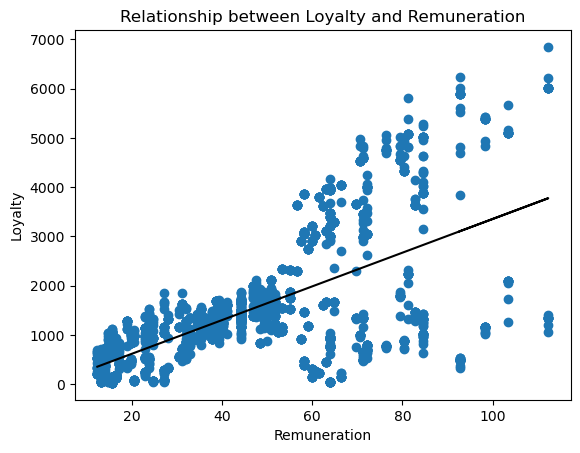

In [22]:
# Plot graph with regression line.
plt.scatter(x1,y1)
plt.plot(x1, y1_pred, color ='black')
plt.title('Relationship between Loyalty and Remuneration')
plt.xlabel('Remuneration')
plt.ylabel('Loyalty')

### 5c) age vs loyalty

In [26]:
# Independent variable.
x2 = reviews_2['age']

# Dependent variable.
y2 = reviews_2['loyalty_points']

# OLS model and summary.
f = 'y2 ~ x2'
test2 = ols(f, data=reviews_2).fit()
test2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y2   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Wed, 07 Jun 2023   Prob (F-statistic):             0.0577
Time:                        21:16:23   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x2            -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
# Extract the estimated parameters.
print("Parameters: ", test2.params)

# Extract the standard errors.
print("Standard errors: ", test2.bse)

# Extract the predicted values.
print("Predicted values: ", test2.predict())


Parameters:  Intercept    1736.517739
x2             -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x2            2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [29]:
# Set the X coefficient and the constant to generate the regression table.
y2_pred = (1736.52) + (-4.01)*x2

# View the output.
y2_pred

0       1664.34
1       1644.29
2       1648.30
3       1636.27
4       1604.19
         ...   
1995    1588.15
1996    1564.09
1997    1600.18
1998    1600.18
1999    1608.20
Name: age, Length: 2000, dtype: float64

Text(0, 0.5, 'Loyalty')

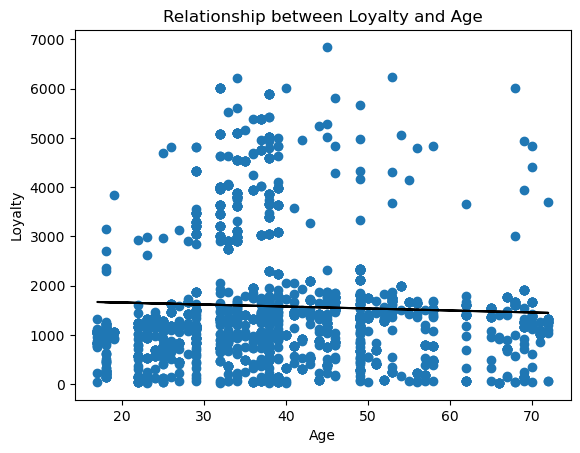

In [31]:
# Plot graph with regression line.
plt.scatter(x2,y2)
plt.plot(x2, y2_pred, color ='black')
plt.title('Relationship between Loyalty and Age')
plt.xlabel('Age')
plt.ylabel('Loyalty')

## 6. Observations and insights

***Your observations here...***






R Squared Value is the greatest (45%) for spending scores and loyalty points indicating that 45% of the total variability of y (loyalty points) is explained by x (spending scores). The value is the least for Age and Loyalty points hence indicating that the total variablity is not explained and there is hardly any linear relationship between the variables. We can observe that as spending score increases, loyalty increases. Moreover as remuneration of a customer increases, we can observe that loyalty increases. There are however alot of residual points above a remuneration and spending score of 60. 


# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [2]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [5]:
# Load the CSV file(s) as df2.
df2 = pd.read_csv('turtle_reviews.csv')

# View DataFrame.
df2.head()

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [6]:
# Drop unnecessary columns.
df2_data = df2.drop(columns = ['age', 'loyalty_points', 'education', 'language', 'platform', 'product', 'review', 'summary'])

# View DataFrame.
df2_data.head()

gender  remuneration (k£)  spending_score (1-100)
0    Male              12.30                      39
1    Male              12.30                      81
2  Female              13.12                       6
3  Female              13.12                      77
4  Female              13.94                      40

In [7]:
# Explore the data.
# Determine the number of null values.
df2_data.isnull().sum()

gender                    0
remuneration (k£)         0
spending_score (1-100)    0
dtype: int64

In [8]:
# Rename the column headers.
df2_data.rename(columns={'remuneration (k£)':'remuneration', 'spending_score (1-100)':'spending'}, inplace=True)

# View column names.
df2_data.columns.values

array(['gender', 'remuneration', 'spending'], dtype=object)

In [9]:
# Descriptive statistics.
df2_data.describe()

remuneration     spending
count   2000.000000  2000.000000
mean      48.079060    50.000000
std       23.123984    26.094702
min       12.300000     1.000000
25%       30.340000    32.000000
50%       47.150000    50.000000
75%       63.960000    73.000000
max      112.340000    99.000000

## 2. Plot

<AxesSubplot:xlabel='remuneration', ylabel='spending'>

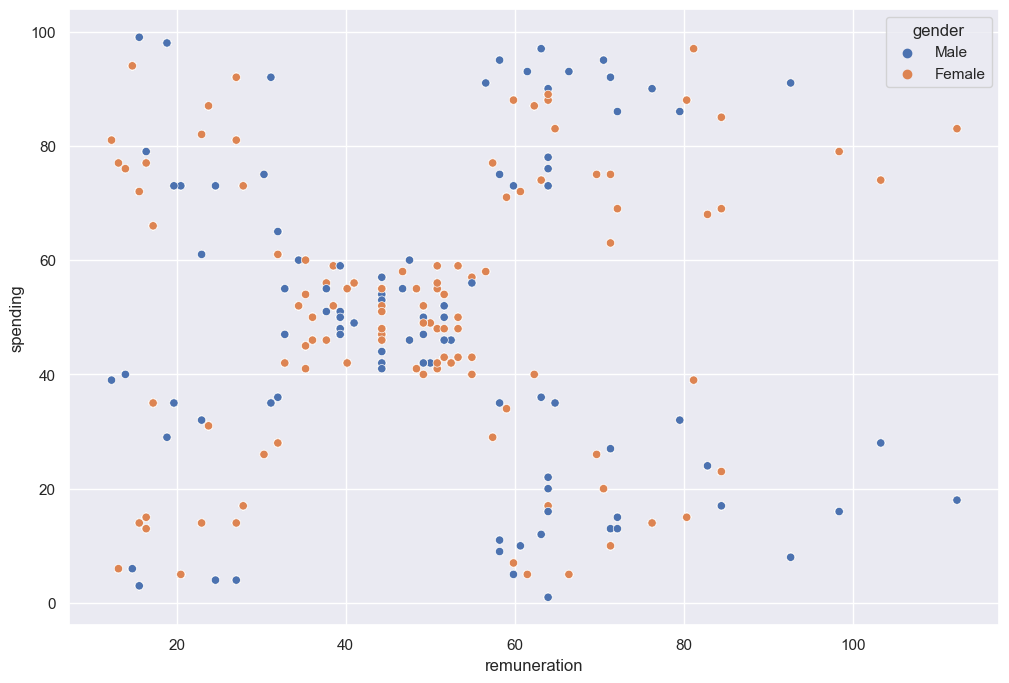

In [10]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x = 'remuneration', y = 'spending', hue = 'gender', data = df2_data)

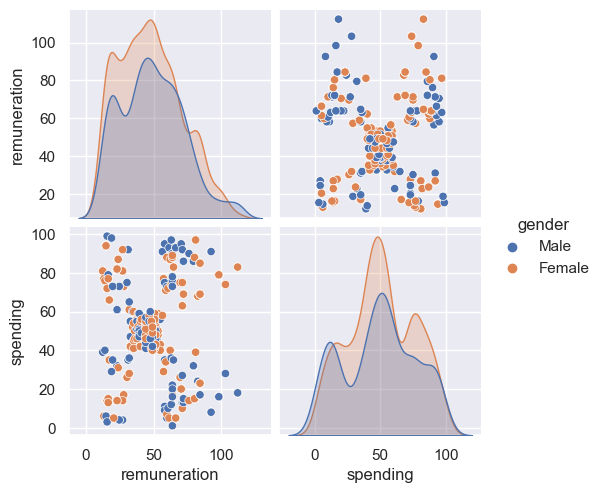

In [11]:
# Create a pairplot with Seaborn.
x = df2_data[['remuneration', 'spending']]

sns.pairplot(df2_data, vars = x, hue = 'gender', diag_kind = 'kde')

## 3. Elbow and silhoutte methods

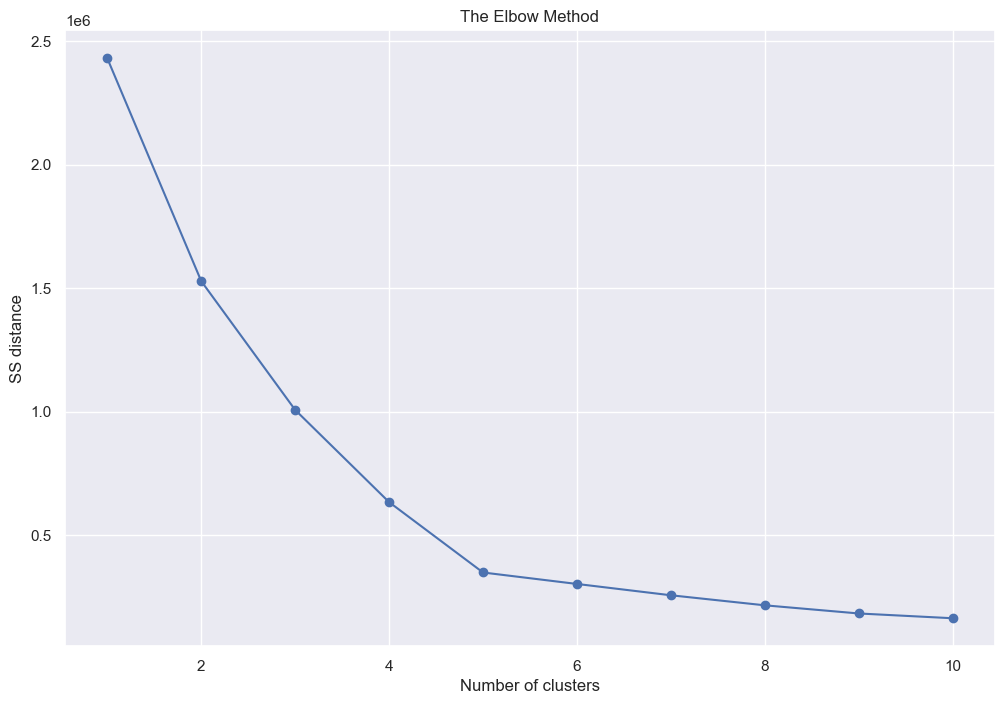

In [13]:
# Determine the number of clusters: Elbow method.
# Import the KMeans class 
from sklearn.cluster import KMeans

# Elbow chart to decide on the numer of optimal clusters

ss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    
    kmeans.fit(x)
    ss.append(kmeans.inertia_)
    
# Plot the Elbow method. Plot the sum of square distances from each of its assigned centre. 

plt.plot(range(1,11), ss, marker='o')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS distance")

plt.show()

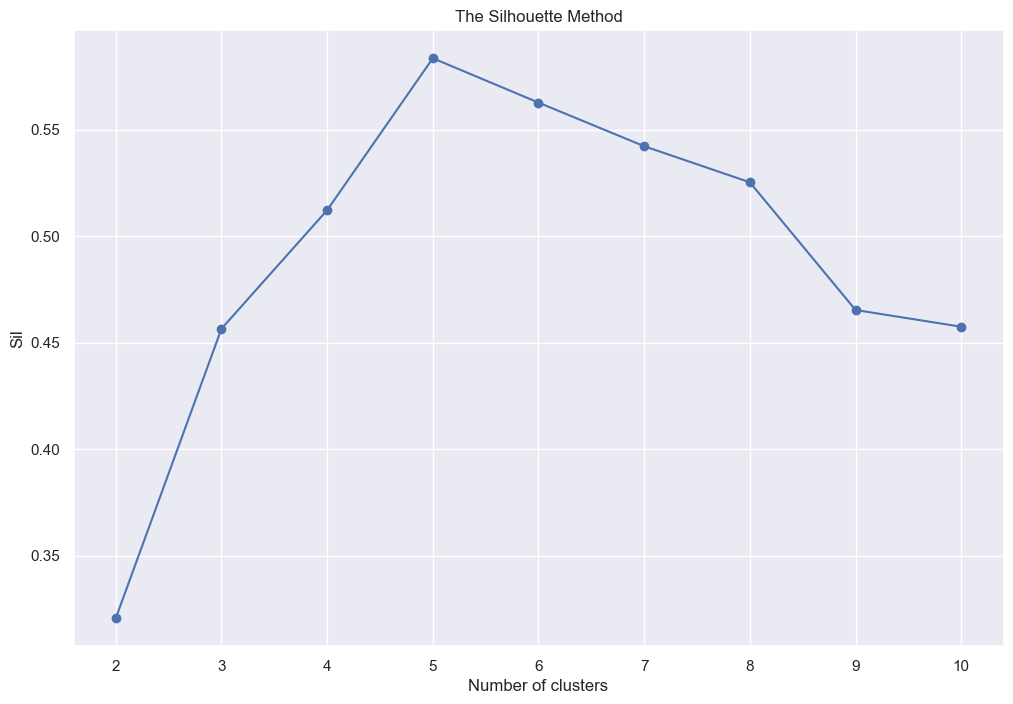

In [14]:
# Determine the number of clusters: Silhouette method.
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric='euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

# Insert labels and title.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

## 4. Evaluate k-means model at different values of *k*

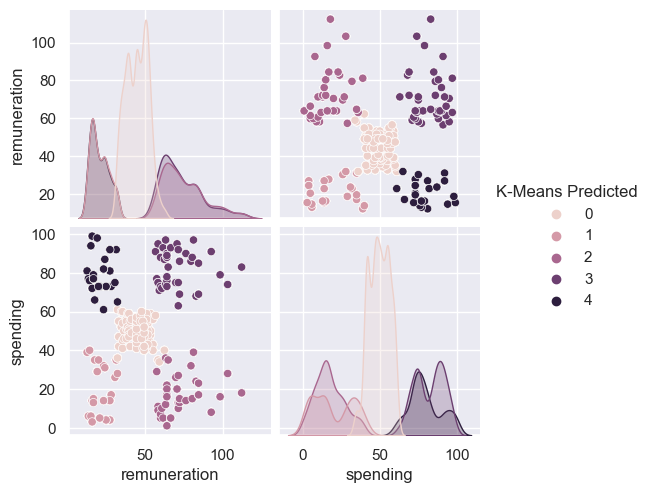

In [15]:
# Use Five clusters

kmeans = KMeans(n_clusters=5, max_iter=15000, init='k-means++', random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted 
sns.pairplot(x, hue = 'K-Means Predicted', diag_kind='kde')

In [16]:
# Check the number of observations per predicted class
x['K-Means Predicted'].value_counts()

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

0    1013
3     356
2     351
1     280
Name: K-Means Predicted, dtype: int64

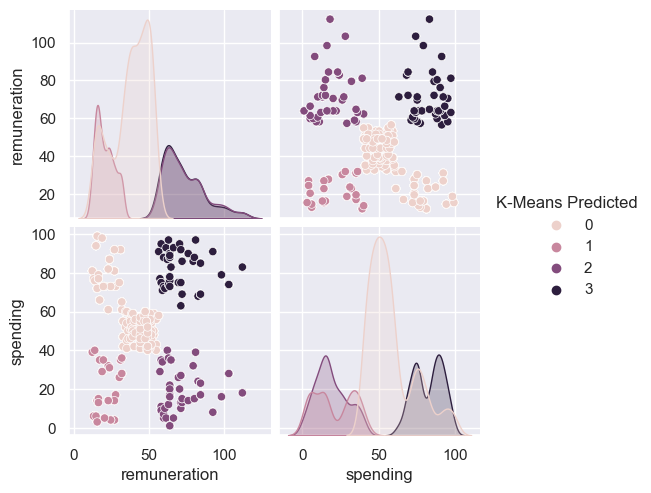

In [26]:
# Use Four clusters

kmeans = KMeans(n_clusters=4, max_iter=15000, init='k-means++', random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted 
sns.pairplot(x, hue = 'K-Means Predicted', diag_kind='kde')

# Check the number of observations per predicted class
x['K-Means Predicted'].value_counts()

1    1293
2     356
0     351
Name: K-Means Predicted, dtype: int64

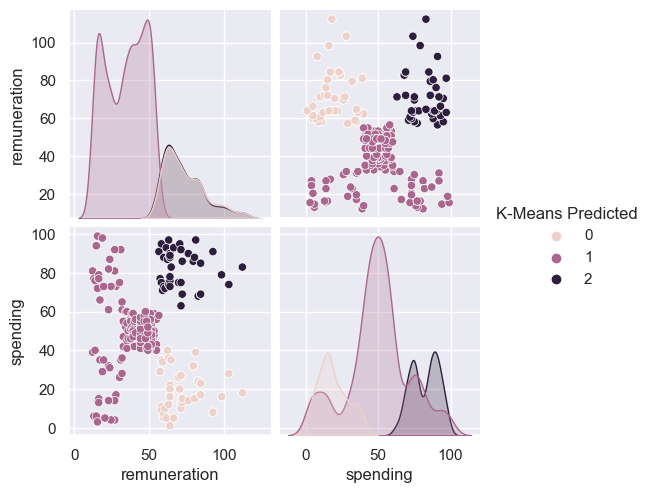

In [27]:
# Use Three clusters

kmeans = KMeans(n_clusters=3, max_iter=15000, init='k-means++', random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted 
sns.pairplot(x, hue = 'K-Means Predicted', diag_kind='kde')

# Check the number of observations per predicted class
x['K-Means Predicted'].value_counts()

## 5. Fit final model and justify your choice

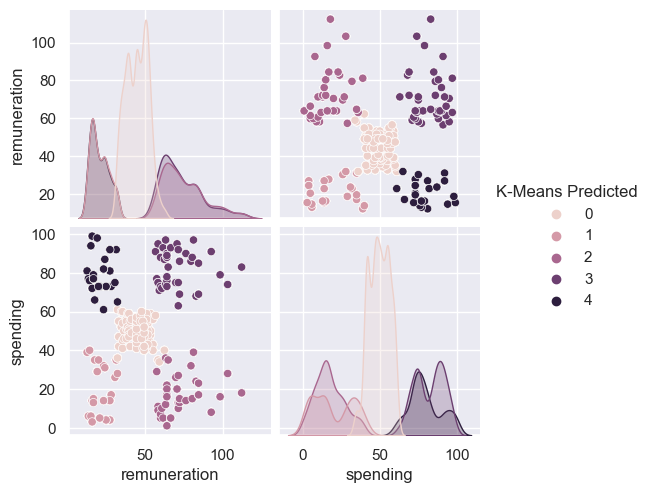

In [28]:
# Apply the final model.
# Use Five clusters

kmeans = KMeans(n_clusters=5, max_iter=15000, init='k-means++', random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted 
sns.pairplot(x, hue = 'K-Means Predicted', diag_kind='kde')

In [29]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

## 6. Plot and interpret the clusters

gender  remuneration  spending
0    Male         12.30        39
1    Male         12.30        81
2  Female         13.12         6
3  Female         13.12        77
4  Female         13.94        40

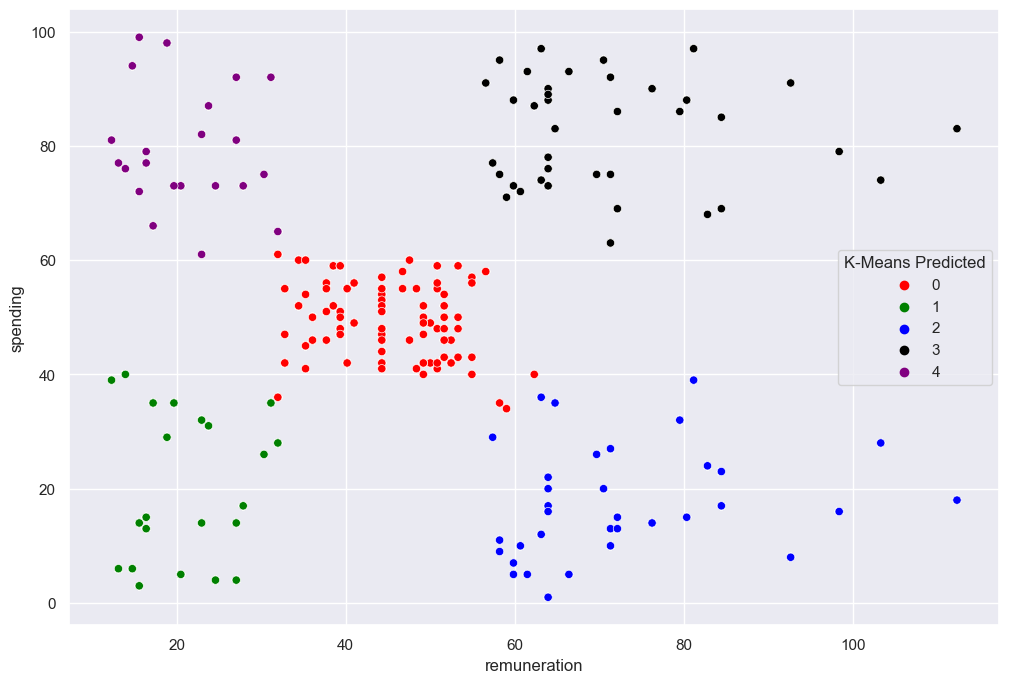

In [33]:
# Visualising the clusters.

# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot.
sns.scatterplot(x='remuneration' , 
                y ='spending',
                data=x,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'purple'])
# View the DataFrame.
df2_data.head()

<AxesSubplot:xlabel='remuneration', ylabel='spending'>

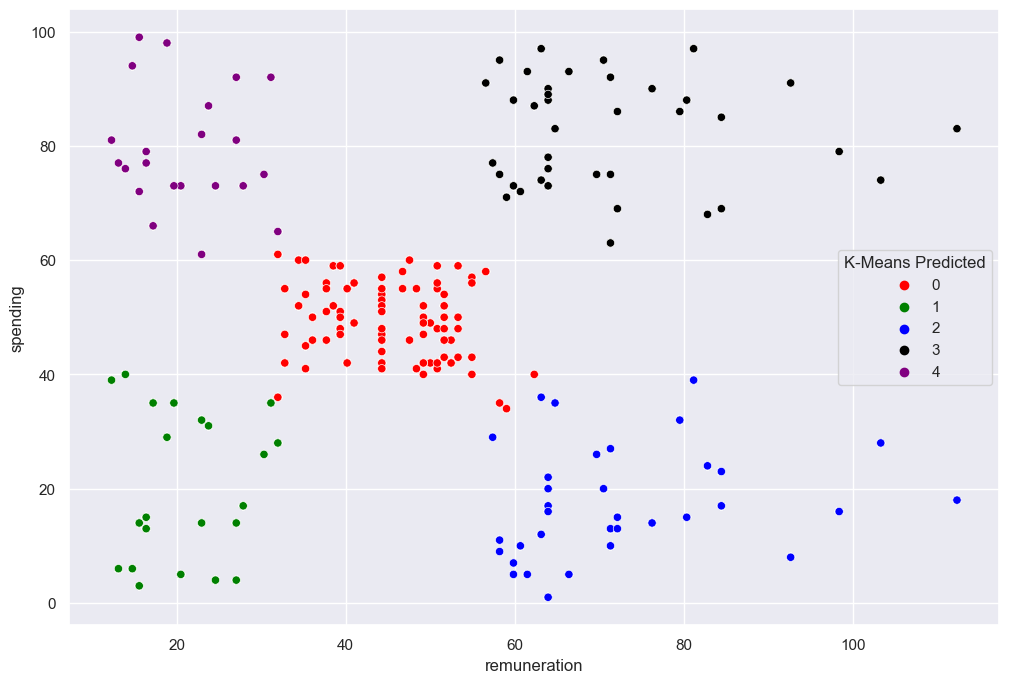

In [34]:
# Visualising the clusters.

sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot.
sns.scatterplot(x='remuneration' , 
                y ='spending',
                data=x,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'purple'])


## 7. Discuss: Insights and observations

***Your observations here...***

The Elbow method was used to determine the number of clusters as 5 since the SS starts declining from there hence suggesting greater homogeneity. Moreover the peak of the Silhouette graph suggests the value is closer to 1 when there are 5 clusters meaning the points within each of the 5 clusters are very similar. Cluster 5 shows a remuneration and spending of £50k and 50 pts respectively. A model of 4 and 3 clusters was also observed but 5 seemed to be the best fit as the clusters do not seem to be overlapping unlike in 3 or 4 clusters. 

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [47]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [48]:
# Load the data set as df3.
df3 = pd.read_csv('turtle_reviews.csv')

# View DataFrame.
df3

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0       Male   18              12.30                      39             210   
1       Male   23              12.30                      81             524   
2     Female   22              13.12                       6              40   
3     Female   25              13.12                      77             562   
4     Female   33              13.94                      40             366   
...      ...  ...                ...                     ...             ...   
1995  Female   37              84.46                      69            4031   
1996  Female   43              92.66                       8             539   
1997    Male   34              92.66                      91            5614   
1998    Male   34              98.40                      16            1048   
1999    Male   32              92.66                       8             479   

     education language platform  product  \
0     graduate       EN      Web      453   
1     graduate       EN      Web      466   
2     graduate       EN      Web      254   
3     graduate       EN      Web      263   
4     graduate       EN      Web      291   
...        ...      ...      ...      ...   
1995       PhD       EN      Web      977   
1996       PhD       EN      Web      979   
1997  graduate       EN      Web     1012   
1998       PhD       EN      Web     1031   
1999       PhD       EN      Web      453   

                                                 review  \
0     When it comes to a DM's screen, the space on t...   
1     An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     Nice art, nice printing.  Why two panels are f...   
3     Amazing buy! Bought it as a gift for our new d...   
4     As my review of GF9's previous screens these w...   
...                                                 ...   
1995  The perfect word game for mixed ages (with Mom...   
1996  Great game.  Did not think I would like it whe...   
1997  Great game for all.........\nKeeps the mind ni...   
1998                                          fun game!   
1999  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 11 columns]

In [11]:
# Explore data set.
df3.shape

(2000, 11)

In [12]:
# Keep necessary columns. Drop unnecessary columns.
df3 = df3.drop(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)', 'loyalty_points', 'education', 'language', 'platform', 'product'], axis=1)

# View DataFrame.
df3

review  \
0     When it comes to a DM's screen, the space on t...   
1     An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     Nice art, nice printing.  Why two panels are f...   
3     Amazing buy! Bought it as a gift for our new d...   
4     As my review of GF9's previous screens these w...   
...                                                 ...   
1995  The perfect word game for mixed ages (with Mom...   
1996  Great game.  Did not think I would like it whe...   
1997  Great game for all.........\nKeeps the mind ni...   
1998                                          fun game!   
1999  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 2 columns]

In [14]:
# Determine if there are any missing values.
df3['review'].isna().sum()
# There are no missing values in the data set

0

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [15]:
# Review: Change all to lower case and join with a space.
df3['review'] = df3['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df3['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [16]:
# Summary: Change all to lower case and join with a space.
df3['summary'] = df3['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df3['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [17]:
# Replace all the punctuations in review column.
df3['review'] = df3['review'].str.replace('[^\w\s]','')

# View output.
df3['review']

0       when it comes to a dms screen the space on the...
1       an open letter to galeforce9 your unpainted mi...
2       nice art nice printing why two panels are fill...
3       amazing buy bought it as a gift for our new dm...
4       as my review of gf9s previous screens these we...
                              ...                        
1995    the perfect word game for mixed ages with mom ...
1996    great game did not think i would like it when ...
1997             great game for all keeps the mind nimble
1998                                             fun game
1999    this game is fun a lot like scrabble without a...
Name: review, Length: 2000, dtype: object

In [18]:
# Replace all the puncuations in summary column.
df3['summary'] = df3['summary'].str.replace('[^\w\s]','')

# View output.
df3['summary']

0       the fact that 50 of this space is wasted on ar...
1       another worthless dungeon masters screen from ...
2                          pretty but also pretty useless
3                                              five stars
4                                              money trap
                              ...                        
1995        the perfect word game for mixed ages with mom
1996                                            super fun
1997                                           great game
1998                                           four stars
1999                                       love this game
Name: summary, Length: 2000, dtype: object

### 2c) Drop duplicates in both columns

In [19]:
# Drop duplicates in both columns.
# Check the number of duplicate values in review column 
df3.review.duplicated().sum()
# Drop duplicates
df4 = df3.drop_duplicates(subset=['review'])
# View DataFrame.
df4.reset_index(inplace = True)
df4.head()

# Check the number of duplicate values in summary column
df4.summary.duplicated().sum()
# Drop duplicates 
df5 = df4.drop_duplicates(subset=['summary'])
# View DataFrame
df5.reset_index(inplace = True)
df5.head()
df5.shape

(1349, 4)

## 3. Tokenise and create wordclouds

In [20]:
# Create new DataFrame (copy DataFrame).
# Tokenise the words.
df5['tokens_review'] = df5['review'].apply(word_tokenize)

# View DataFrame.
df5['tokens_review'].head()

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: tokens_review, dtype: object

In [21]:
# Apply tokenisation to both columns.
df5['tokens_summary'] = df5['summary'].apply(word_tokenize)
# View DataFrame.
df5['tokens_summary'].head()

0    [the, fact, that, 50, of, this, space, is, was...
1    [another, worthless, dungeon, masters, screen,...
2                 [pretty, but, also, pretty, useless]
3                                        [five, stars]
4                                        [money, trap]
Name: tokens_summary, dtype: object

In [42]:
# Review: Create a word cloud.
# String all the comments together in a single variable.
# Create an empty string variable.
all_comments = ''
for i in range(df5.shape[0]):
    # Add each comment.
    all_comments = all_comments + df5['review'][i]
    
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_comments) 

NameError: name 'sns' is not defined

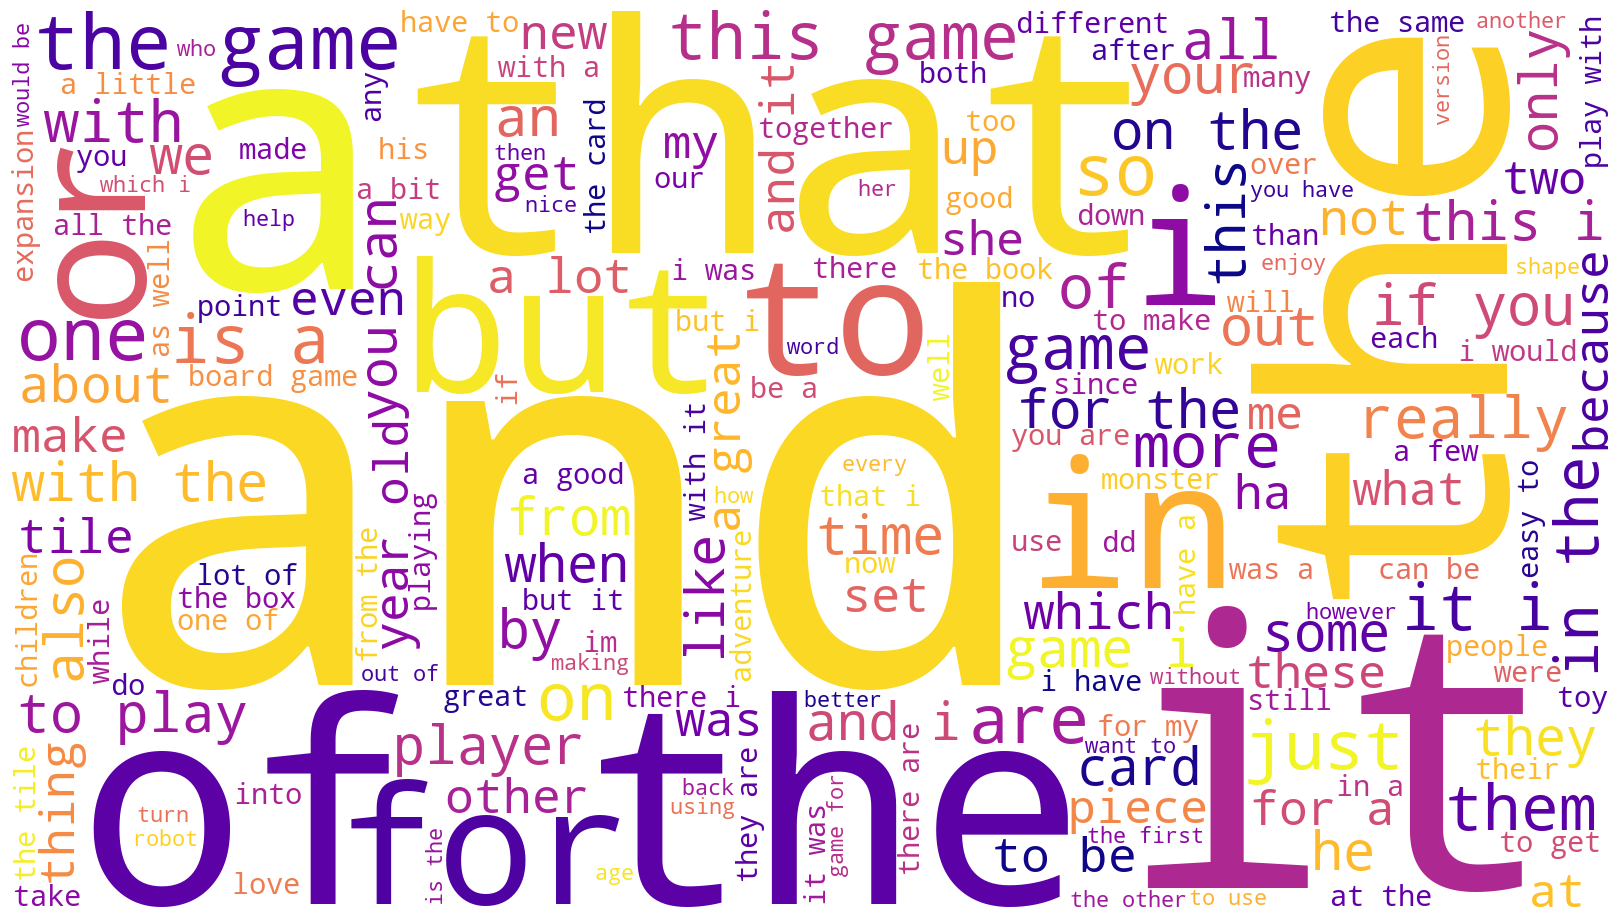

In [72]:
# Review: Plot the WordCloud image.
                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

> Stopwords such as 'and', 'of', 'the', 'it', 'that' and 'for' are high in frequency

In [73]:
# Summary: Create a word cloud.
total_comments = ''
for i in range(df5.shape[0]):
    # Add each comment.
    total_comments = total_comments + df5['summary'][i]
    
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(total_comments) 

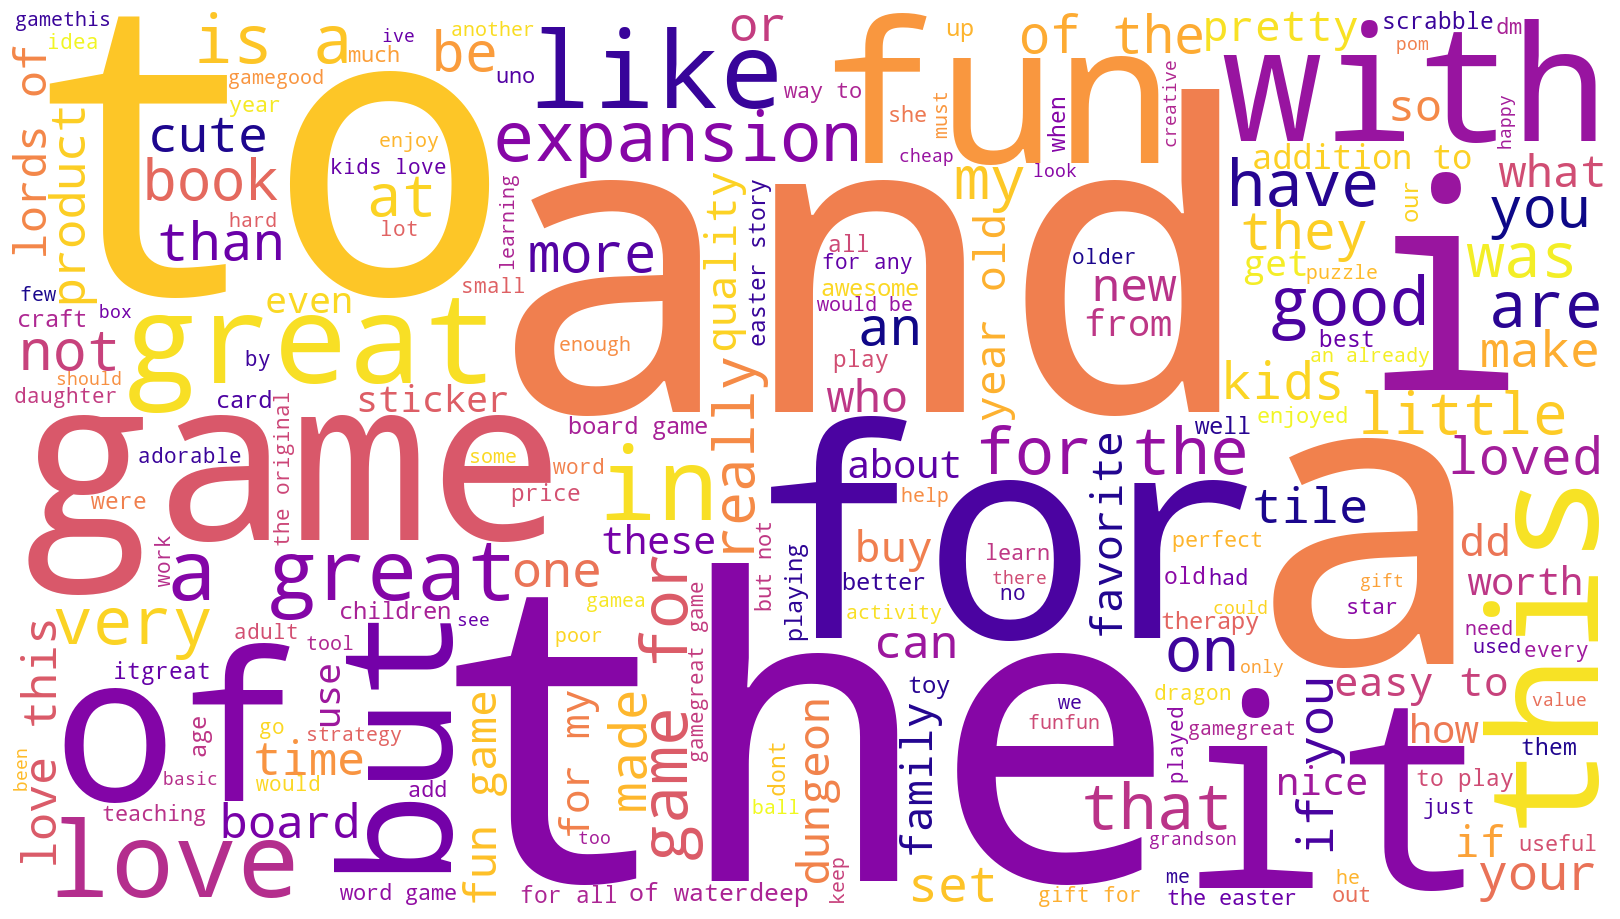

In [74]:
# Summary: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

> Stopwords such as 'to', 'and', 'of', 'the', 'a' and 'for' are high in frequency

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [93]:
# Determine the frequency distribution for review column 
# Define an empty list of tokens.
all_tokens1 = []

for i in range(df5.shape[0]):
    # Add each token to the list.
    all_tokens1 = all_tokens1 + df5['tokens_review'][i]
    
fdist = FreqDist(all_tokens1)

# Preview the Data 
fdist

FreqDist({'the': 5019, 'and': 2934, 'to': 2843, 'a': 2829, 'of': 2261, 'i': 1887, 'it': 1830, 'is': 1593, 'this': 1549, 'for': 1360, ...})

In [95]:
# Determine the frequency distribution for summary column 
# Define an empty list of tokens.
all_tokens2 = []

for i in range(df5.shape[0]):
    # Add each token to the list.
    all_tokens2 = all_tokens2 + df5['tokens_summary'][i]
    
fdist1 = FreqDist(all_tokens2)

# Preview the Data 
fdist1

FreqDist({'game': 268, 'the': 257, 'a': 238, 'great': 236, 'for': 229, 'to': 192, 'fun': 175, 'and': 168, 'it': 139, 'of': 131, ...})

> Game has the highest frequency of words followed by 'the' and 'a'

### 4b) Remove alphanumeric characters and stopwords

In [104]:
# Delete all the alphanumeric characters
tokens1 = [word for word in all_tokens1 if word.isalnum()]

In [105]:
tokens2 = [word for word in all_tokens2 if word.isalnum()]

In [133]:
# Remove all the stopwords
# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords.
tokens3 = [x for x in tokens1 if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens3_string = ''

for value in tokens:
    # Add each filtered token word to the string.
    tokens3_string = tokens3_string + value + ' '

In [137]:
# Remove all the stopwords
# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords.
tokens4 = [x for x in tokens2 if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens4_string = ''

for value in tokens:
    # Add each filtered token word to the string.
    tokens4_string = tokens4_string + value + ' '

### 4c) Create wordcloud without stopwords

In [111]:
# Create a wordcloud without stop words.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens3_string) 


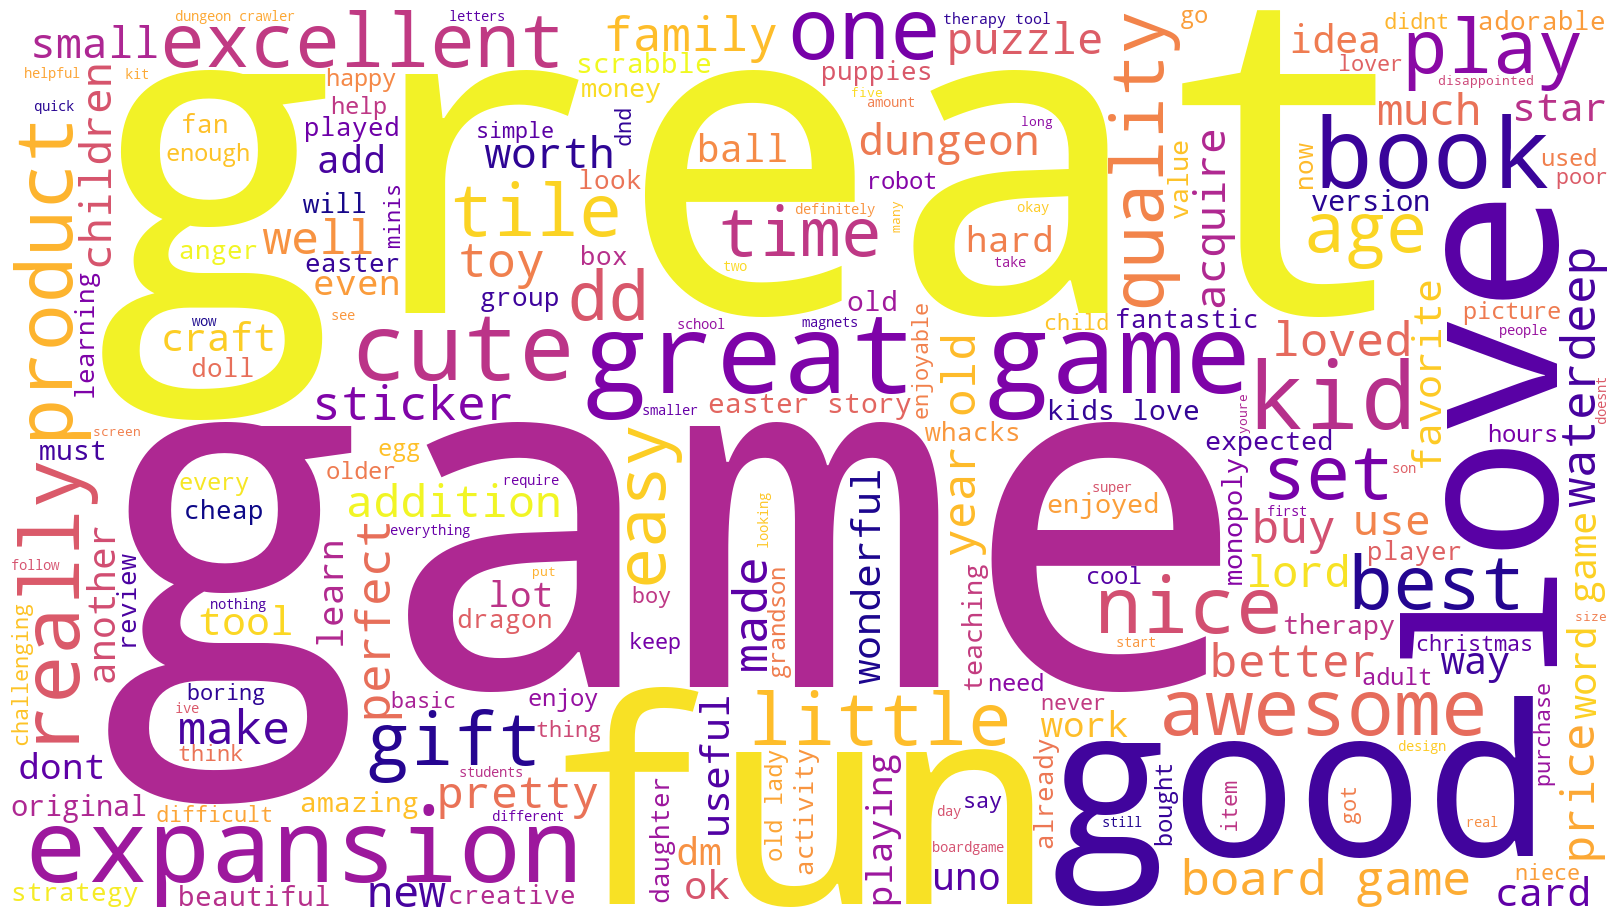

In [112]:
# Plot the wordcloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()


### 4d) Identify 15 most common words and polarity

In [138]:
# Determine the 15 most common words for Review Column
# View the frequency distribution.
fdist2 = FreqDist(tokens3)

# Preview the data.
fdist2

FreqDist({'game': 1359, 'one': 475, 'play': 442, 'fun': 407, 'great': 391, 'like': 373, 'get': 293, 'cards': 281, 'tiles': 280, 'really': 278, ...})

In [139]:
# Generate a DataFrame from Counter.
counts1 = pd.DataFrame(Counter(tokens3).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts1

Frequency
Word             
game         1359
one           475
play          442
fun           407
great         391
like          373
get           293
cards         281
tiles         280
really        278
book          259
would         252
well          246
time          244
new           237

In [140]:
# Determine the 15 most common words for Summary Column
# View the frequency distribution.
fdist3 = FreqDist(tokens4)

# Preview the data.
fdist3

FreqDist({'game': 268, 'great': 236, 'fun': 175, 'good': 84, 'love': 70, 'like': 54, 'kids': 48, 'book': 42, 'expansion': 42, 'cute': 40, ...})

In [141]:
# Generate a DataFrame from Counter.
counts2 = pd.DataFrame(Counter(tokens4).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts2

Frequency
Word                
game             268
great            236
fun              175
good              84
love              70
like              54
kids              48
book              42
expansion         42
cute              40
old               34
really            30
set               29
nice              28
one               28

### Visualize the 15 most common words in Reviews 

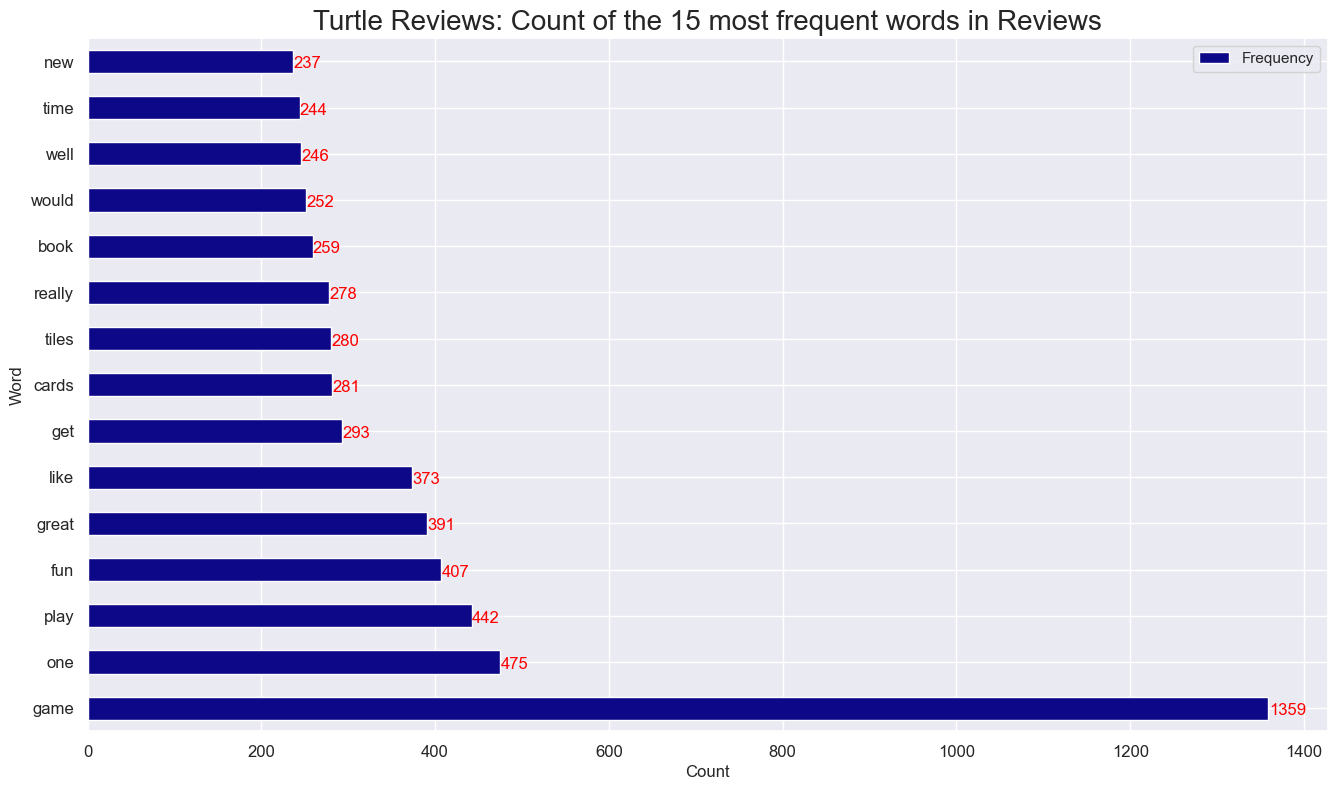

In [142]:
# Set the plot type.
ax = counts1.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Turtle Reviews: Count of the 15 most frequent words in Reviews",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

### Visualize the 15 most common words in Summary

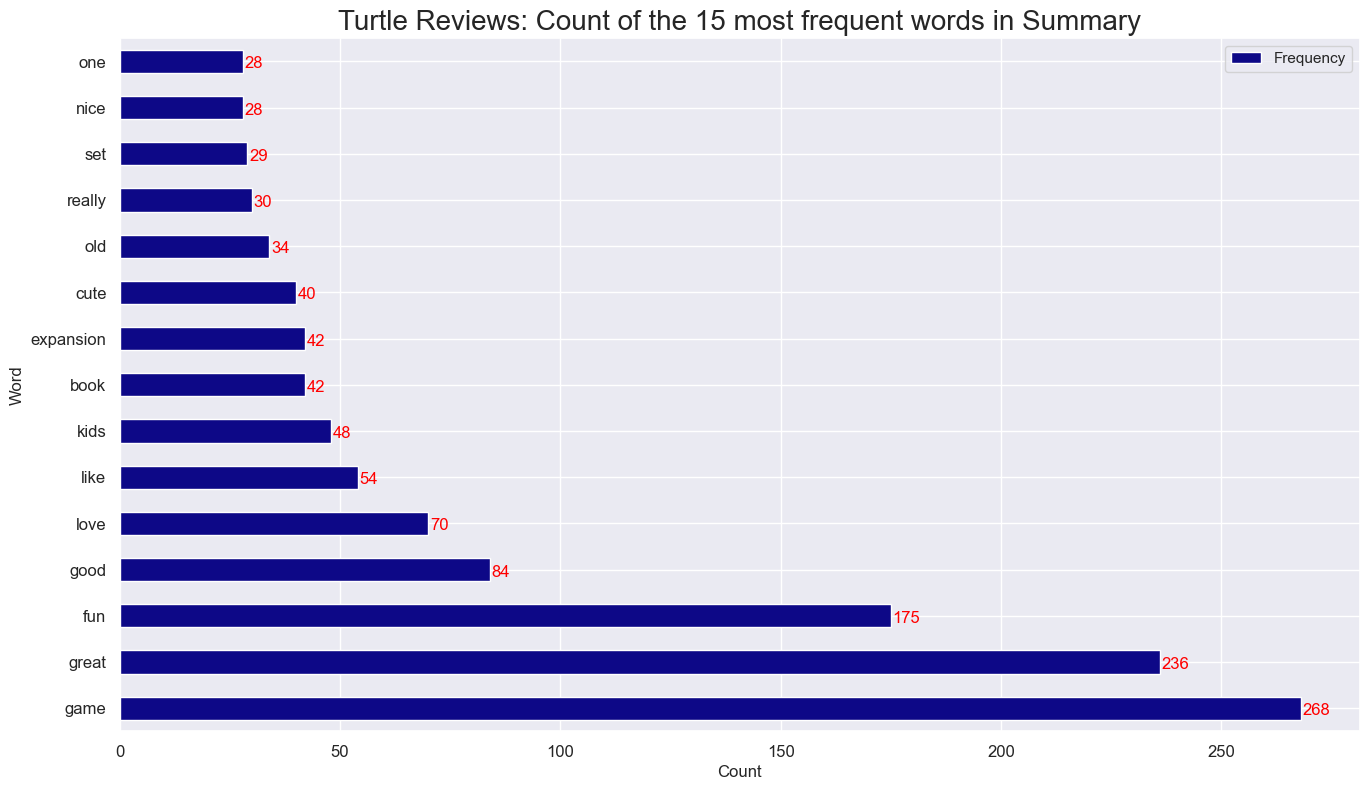

In [143]:
# Set the plot type.
ax = counts2.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Turtle Reviews: Count of the 15 most frequent words in Summary",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [54]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [55]:
# Determine polarity of Review column. 
# Populate a new column with polarity scores for each comment.
df5['polarity_review'] = df5['review'].apply(generate_polarity)

# View output.
df5['polarity_review'].head()

0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: polarity_review, dtype: float64

In [56]:
# Determine polarity of Summary column.
# Populate a new column with polarity scores for each comment.
df5['polarity_summary'] = df5['summary'].apply(generate_polarity)

# View output.
df5['polarity_summary'].head()

0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: polarity_summary, dtype: float64

### Determine the Subjectivity Score for Review and Summary columns

In [44]:
# Define a function to extract a subjectivity score for the review comments.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

# Populate a new column with subjectivity scores for each comment.
df5['subjectivity_review'] = df5['review'].apply(generate_subjectivity)

# Preview the result.
df5['subjectivity_review'].head()

0    0.486111
1    0.442976
2    0.430435
3    0.784848
4    0.316667
Name: subjectivity_review, dtype: float64

In [51]:
# Define a function to extract a subjectivity score for the summary comment.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

# Populate a new column with subjectivity scores for each comment.
df5['subjectivity_summary'] = df5['summary'].apply(generate_subjectivity)

# Preview the result.
df5['subjectivity_summary'].head()

0    0.500000
1    0.900000
2    0.733333
3    0.000000
4    0.000000
Name: subjectivity_summary, dtype: float64

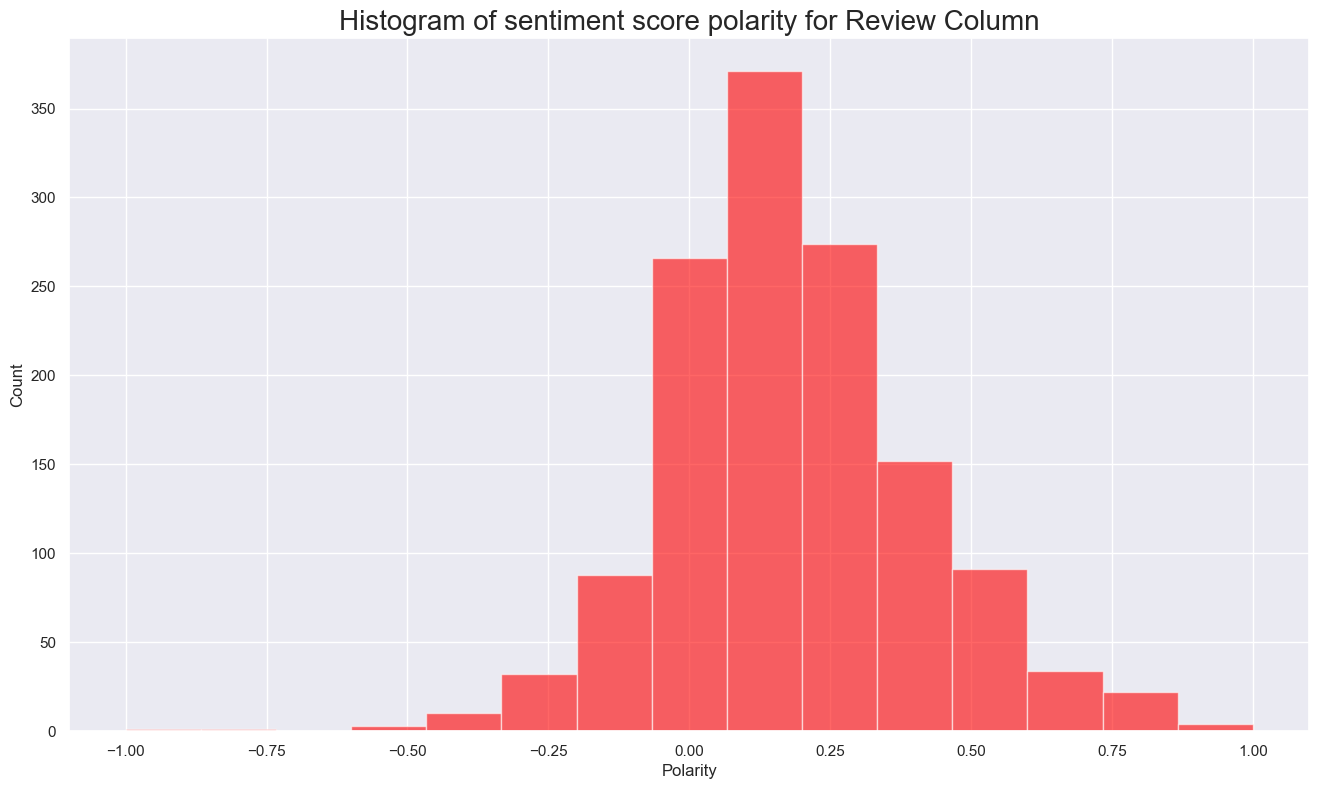

In [156]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df5['polarity_review'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity for Review Column', fontsize=20)

plt.show()
# Histogram of sentiment score


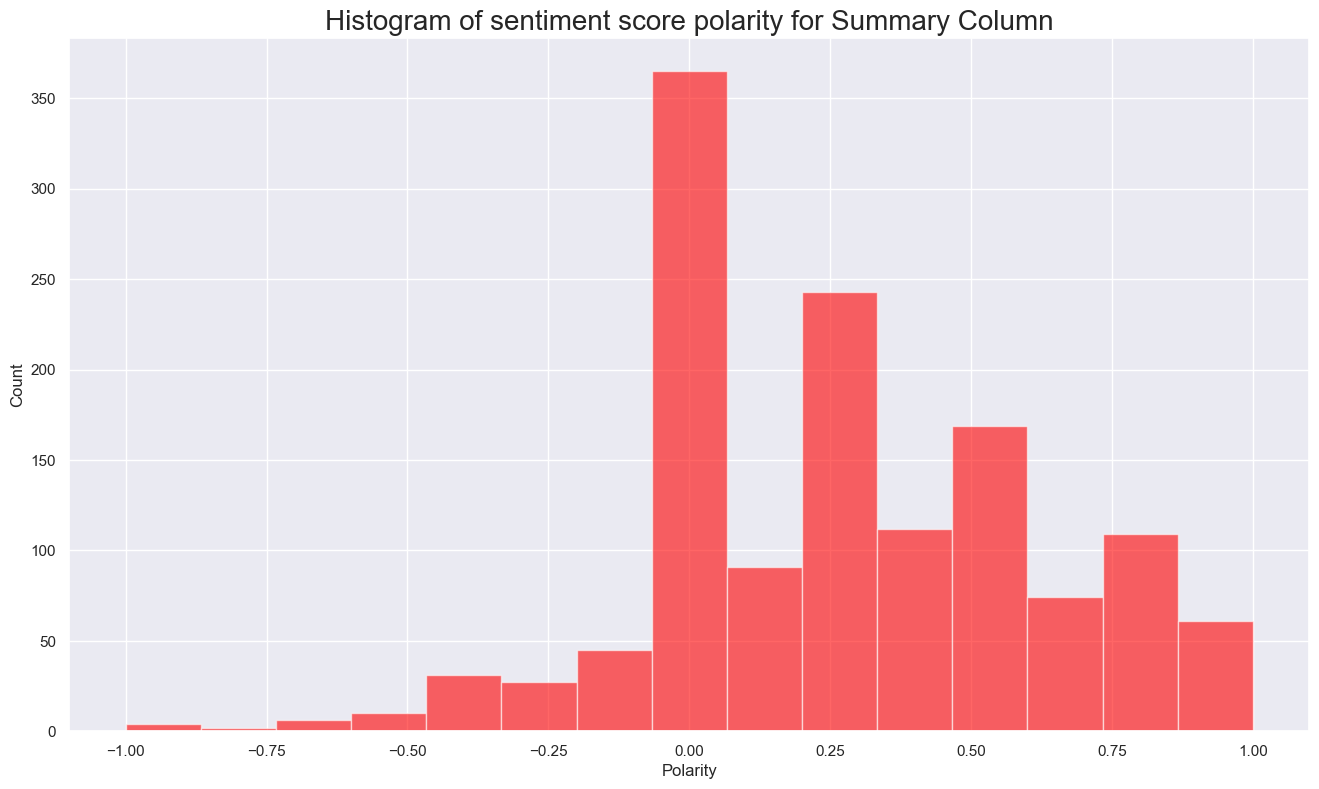

In [157]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df5['polarity_summary'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity for Summary Column', fontsize=20)

plt.show()

# Histogram of sentiment score


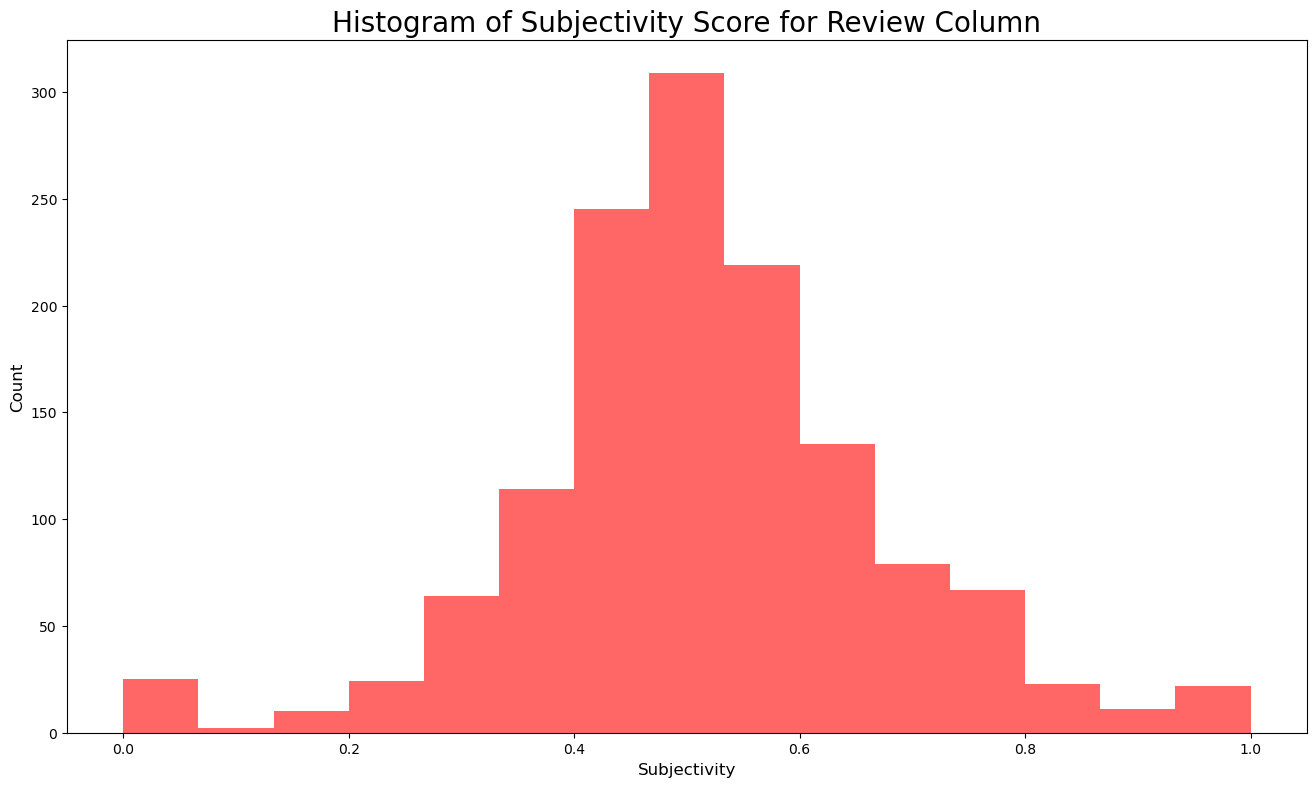

In [49]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df5['subjectivity_review'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Subjectivity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of Subjectivity Score for Review Column', fontsize=20)

plt.show()
# Histogram of subjectivity score

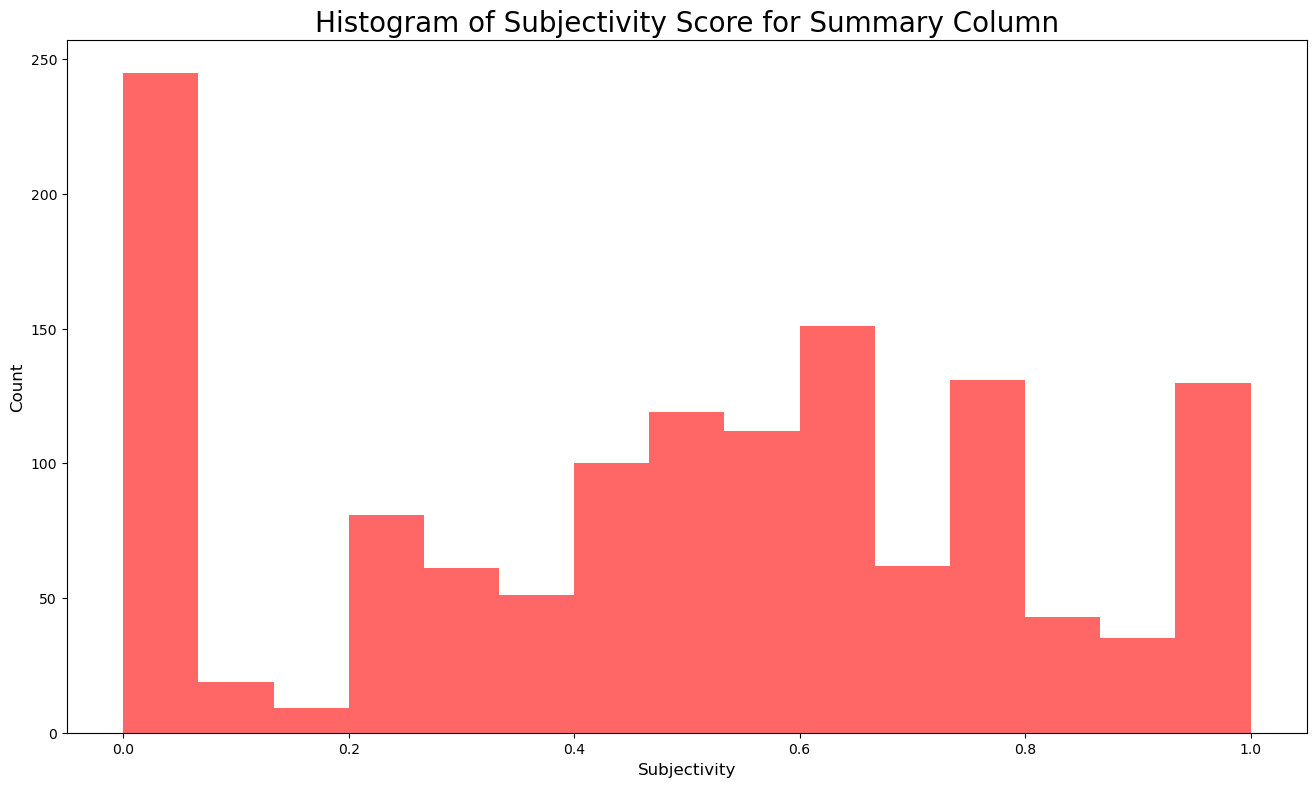

In [53]:
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df5['subjectivity_summary'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Subjectivity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of Subjectivity Score for Summary Column', fontsize=20)

plt.show()

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [172]:
# Top 20 negative reviews.
# Create a DataFrame.
negative_sentiment_review = df5.nsmallest(20, 'polarity_review')

# Eliminate unnecessary columns.
negative_sentiment_review = negative_sentiment_review[['review', 'polarity_review', 'subjectivity_review']]

# Eliminate unnecessary columns.
negative_sentiment_review.style.set_properties(subset=['review'], **{'width': '1200px'})


In [171]:
# Top 20 negative summaries.
negative_sentiment_summary = df5.nsmallest(20, 'polarity_summary')

# Eliminate unnecessary columns.
negative_sentiment_summary = negative_sentiment_summary[['summary', 'polarity_summary', 'subjectivity_summary']]

# Eliminate unnecessary columns.
negative_sentiment_summary.style.set_properties(subset=['summary'], **{'width': '1200px'})




In [174]:
# Top 20 positive reviews.

# Extract Positive Comments 
# Create a DataFrame.
positive_sentiment_review = df5.nlargest(20, 'polarity_review')

# Eliminate unnecessary columns.
positive_sentiment_review = positive_sentiment_review[['review', 'polarity_review', 'subjectivity_review']]

# Adjust the column width.
positive_sentiment_review.style.set_properties(subset=['review'], **{'width': '1200px'})




In [173]:
# Top 20 positive summaries.

# Extract Positive Comments 
# Create a DataFrame.
positive_sentiment_summary = df5.nlargest(20, 'polarity_summary')

# Eliminate unnecessary columns.
positive_sentiment_summary = positive_sentiment_summary[['summary', 'polarity_summary', 'subjectivity_summary']]

# Adjust the column width.
positive_sentiment_summary.style.set_properties(subset=['summary'], **{'width': '1200px'})




### Text Blob for measuring sentiment and subjective scores 

In [3]:
# Install TextBlob.
!pip install textblob

# Import the necessary package.
from textblob import TextBlob
TextBlob("one of my staff will be using this game soon so i dont know how well it works as yet but after looking at the cards i believe it will be helpful in getting a conversation started regarding anger and what to do to control it").sentiment

Sentiment(polarity=-0.55, subjectivity=0.30000000000000004)

In [4]:
TextBlob("wonderful designs").sentiment

Sentiment(polarity=1.0, subjectivity=1.0)

### Visualising Named Entities for Reviews and Summaries 

In [23]:
# Install spaCy for Windows and macOS.
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download en_core_web_sm

  Using cached pip-23.1.2-py3-none-any.whl (2.1 MB)
  Using cached setuptools-68.0.0-py3-none-any.whl (804 kB)
  Using cached wheel-0.40.0-py3-none-any.whl (64 kB)


ERROR: To modify pip, please run the following command:
C:\Users\sanas\anaconda3\python.exe -m pip install -U pip setuptools wheel


     --------------------------------------- 12.8/12.8 MB 20.4 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [25]:
# Install the spaCy library if you did not complete this task previously.
!pip install spaCy

# Import the library.
import spacy

# Load the English resource.
nlp = spacy.load('en_core_web_sm')

# Return the text snippet and its corresponding entity label in a list.
def generate_named_entities(comment):
 return [(ent.text.strip(), ent.label_) for ent in nlp(comment).ents]

In [27]:
df5['named_entities'] = df5['review'].apply(generate_named_entities)

df5.head()

level_0  index                                             review  \
0        0      0  when it comes to a dms screen the space on the...   
1        1      1  an open letter to galeforce9 your unpainted mi...   
2        2      2  nice art nice printing why two panels are fill...   
3        3      3  amazing buy bought it as a gift for our new dm...   
4        4      4  as my review of gf9s previous screens these we...   

                                             summary  \
0  the fact that 50 of this space is wasted on ar...   
1  another worthless dungeon masters screen from ...   
2                     pretty but also pretty useless   
3                                         five stars   
4                                         money trap   

                                       tokens_review  \
0  [when, it, comes, to, a, dms, screen, the, spa...   
1  [an, open, letter, to, galeforce9, your, unpai...   
2  [nice, art, nice, printing, why, two, panels, ...   
3  [amazing, buy, bought, it, as, a, gift, for, o...   
4  [as, my, review, of, gf9s, previous, screens, ...   

                                      tokens_summary  \
0  [the, fact, that, 50, of, this, space, is, was...   
1  [another, worthless, dungeon, masters, screen,...   
2               [pretty, but, also, pretty, useless]   
3                                      [five, stars]   
4                                      [money, trap]   

                                      named_entities  
0     [(50, CARDINAL), (2, CARDINAL), (1, CARDINAL)]  
1                                [(galeforce9, ORG)]  
2  [(two, CARDINAL), (one, CARDINAL), (npcs, ORG)...  
3                                                 []  
4                                      [(gf9s, ORG)]

In [29]:
from spacy import displacy

# Iterate through a selection of reviews.
for i in range(750,1750):
    # Check whether the corresponding review has a named entity.
    if df5['named_entities'][i]:
        # Highlight the entity in the review.
        displacy.render(nlp(df5['review'][i]), style='ent', jupyter=True)

KeyError: 1349

In [33]:
df5['named_entities1'] = df5['summary'].apply(generate_named_entities)

df5.head()

level_0  index                                             review  \
0        0      0  when it comes to a dms screen the space on the...   
1        1      1  an open letter to galeforce9 your unpainted mi...   
2        2      2  nice art nice printing why two panels are fill...   
3        3      3  amazing buy bought it as a gift for our new dm...   
4        4      4  as my review of gf9s previous screens these we...   

                                             summary  \
0  the fact that 50 of this space is wasted on ar...   
1  another worthless dungeon masters screen from ...   
2                     pretty but also pretty useless   
3                                         five stars   
4                                         money trap   

                                       tokens_review  \
0  [when, it, comes, to, a, dms, screen, the, spa...   
1  [an, open, letter, to, galeforce9, your, unpai...   
2  [nice, art, nice, printing, why, two, panels, ...   
3  [amazing, buy, bought, it, as, a, gift, for, o...   
4  [as, my, review, of, gf9s, previous, screens, ...   

                                      tokens_summary  \
0  [the, fact, that, 50, of, this, space, is, was...   
1  [another, worthless, dungeon, masters, screen,...   
2               [pretty, but, also, pretty, useless]   
3                                      [five, stars]   
4                                      [money, trap]   

                                      named_entities      named_entities1  
0     [(50, CARDINAL), (2, CARDINAL), (1, CARDINAL)]     [(50, CARDINAL)]  
1                                [(galeforce9, ORG)]  [(galeforce9, ORG)]  
2  [(two, CARDINAL), (one, CARDINAL), (npcs, ORG)...                   []  
3                                                 []   [(five, CARDINAL)]  
4                                      [(gf9s, ORG)]                   []

In [35]:
# Iterate through a selection of summaries.
for i in range(750,1750):
    # Check whether the corresponding summary has a named entity.
    if df5['named_entities1'][i]:
        # Highlight the entity in the summary.
        displacy.render(nlp(df5['summary'][i]), style='ent', jupyter=True)

KeyError: 1349

### Generating a Document Term Matrix for Reviews 

In [30]:
# Import the necessary classes.
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

# Use a tokenizer object to remove unwanted elements.
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

# Create a CountVectorizer object to process the review comments
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),
                     tokenizer = token.tokenize)

# Apply the transformation to the review data.
cvs= cv.fit_transform(df5['review'])

In [31]:
# Create a DataFrame.
dt = pd.DataFrame(cvs.todense()).iloc[:15]  

# Name the columns.
dt.columns = cv.get_feature_names()

# Transpose columns and headings.
document_term_matrix = dt.T

# Update the column names.
document_term_matrix.columns = ['Doc '+str(i) for i in range(1, 16)]

# Get the totals.
document_term_matrix['total_count'] = document_term_matrix.sum(axis=1)

# Identify the top 10 words. 
document_term_matrix = document_term_matrix.sort_values(by ='total_count', 
                                                        ascending=False)[:10] 

# Display the results.
print(document_term_matrix.drop(columns=['total_count']).head(10))

           Doc 1  Doc 2  Doc 3  Doc 4  Doc 5  Doc 6  Doc 7  Doc 8  Doc 9  \
screen         2      2      2      0      0      1      1      5      0   
book           0      0      0      0      0      0      0      2      0   
adventure      0      2      4      0      0      0      0      5      0   
sleights       0      0      0      0      0      0      0      0      0   
card           0      0      0      0      0      0      0      0      0   
map            0      1      3      0      0      0      1      4      0   
use            0      1      4      0      0      0      0      1      1   
useful         0      2      5      0      0      0      0      2      0   
screens        0      2      2      0      1      1      0      1      0   
dm             0      2      1      1      0      0      0      2      0   

           Doc 10  Doc 11  Doc 12  Doc 13  Doc 14  Doc 15  
screen          2       0       0       0       0       0  
book            0       0       0       2  

<AxesSubplot:>

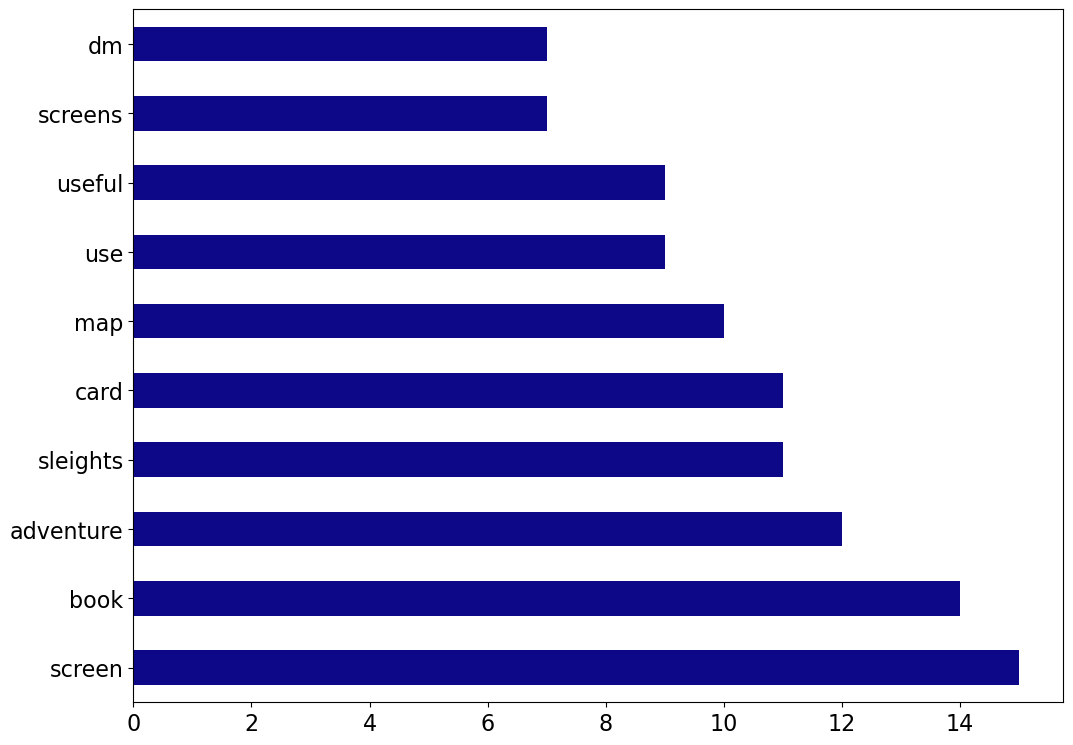

In [32]:
document_term_matrix['total_count'].plot.barh(figsize=(12, 9),
                                              fontsize=16,
                                              colormap ='plasma')

### Generating a Document Term Matrix for Summaries 

In [36]:
# Import the necessary classes.
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

# Use a tokenizer object to remove unwanted elements.
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

# Create a CountVectorizer object to process the review comments
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),
                     tokenizer = token.tokenize)

# Apply the transformation to the review data.
cvs= cv.fit_transform(df5['summary'])

In [37]:
# Create a DataFrame.
dt = pd.DataFrame(cvs.todense()).iloc[:15]  

# Name the columns.
dt.columns = cv.get_feature_names()

# Transpose columns and headings.
document_term_matrix = dt.T

# Update the column names.
document_term_matrix.columns = ['Doc '+str(i) for i in range(1, 16)]

# Get the totals.
document_term_matrix['total_count'] = document_term_matrix.sum(axis=1)

# Identify the top 10 words. 
document_term_matrix = document_term_matrix.sort_values(by ='total_count', 
                                                        ascending=False)[:10] 

# Display the results.
print(document_term_matrix.drop(columns=['total_count']).head(10))

         Doc 1  Doc 2  Doc 3  Doc 4  Doc 5  Doc 6  Doc 7  Doc 8  Doc 9  \
screen       0      1      0      0      0      1      0      0      0   
pretty       0      0      2      0      0      0      0      0      0   
art          2      0      0      0      0      0      0      0      0   
good         0      0      0      0      0      0      0      0      0   
dm           0      0      0      0      0      0      0      0      0   
useless      0      0      1      0      0      0      0      0      0   
money        0      0      0      0      1      0      0      0      0   
mommer       0      0      0      0      0      0      0      0      0   
missed       0      0      0      0      0      0      0      1      0   
product      0      0      0      0      0      0      0      1      0   

         Doc 10  Doc 11  Doc 12  Doc 13  Doc 14  Doc 15  
screen        1       0       0       0       0       0  
pretty        0       0       0       0       0       0  
art        

<AxesSubplot:>

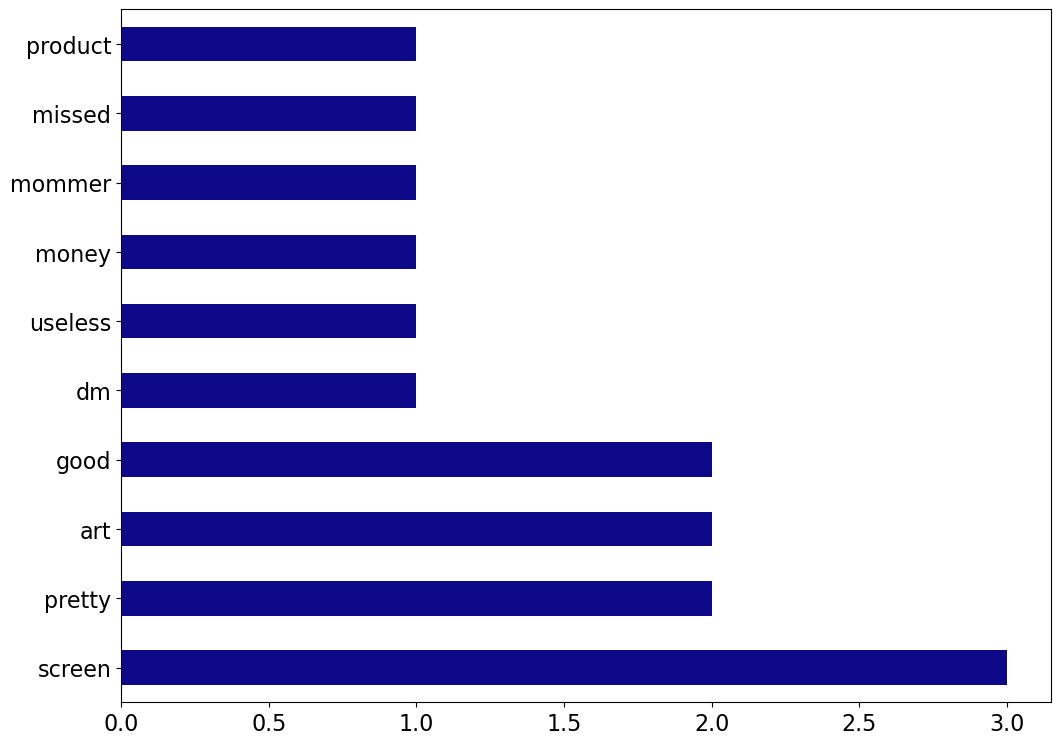

In [39]:
document_term_matrix['total_count'].plot.barh(figsize=(12, 9),
                                              fontsize=16,
                                              colormap ='plasma')

#### Additional Analysis 
> (1) Calculated Subjectivity Scores for Review and Summary Columns and plotted histograms respectively

> (2) Used TextBlob to further analyse the data for Review and Summary Columns

> (3) Visualised Named Entities for Review and Summary Columns

> (4) Generated a Document Term Matrix for Review and Summary Columns

## 7. Discuss: Insights and observations

***Your observations here...***

Sentiment Polarity Scores for Review and Summary 

Review Column 
The sentiment polarity scores for the Review column suggest a large amount of comments between the range of 0 and 0.5 indicating a trend towards the positive sentiment while most of the comments were fairly neutral suggesting that customers are overall liking the game and associating positive feelings towards it. 

Summary Column 
The sentiment polarity scores of the Summary Column suggest that large amount of comments are neutral with a polarity score of 0. A great number of comments further have a score of 0.25, 0.5 and 0.75 indicating a positive sentiment of customers while providing summaries for the game.
Subjectivity Scores for Review and Polarity 

The Subjectivity Score for Review column is greatly between 0.4 and 0.6 hence suggesting opinions which are a mix of fact based and opinion based.
The Subjectivity Score for Summary column however is largely focused on 0 thereby indicating mostly fact based summaries. 

It can be observed that the top 20 positive reviews and summaries also have a subjectivity score close to 1 hence indicating that these reviews and summaries are mostly opinion based rather than being based around facts 

A TextBlob was carried out on a comment “wonderful design” indicating a polarity and subjectivity score of 1 which is highly positive and opinion based. 

Moreover a Document Term Matrix was generated for review and summary columns which suggested the most used document words of screen, book, adventure, pretty and art which overall suggests a positive sentiment towards the game. 


# 